# Predict Vedio Games Rating
ESRB ratings provide information about what’s in a game or app so parents and consumers can make informed choices about which games are right for their family.


Video game sales from Vgchartz and corresponding ratings from Metacritic

E: everyone game

EC: early childhood

K-A: Kids to Adults

E+10: gae 10 and above

T: teen age 13 and above

M: mature age 17 and above

AO: adults only 18+

RB: rating binding


# Import libraryies

In [4]:
# import libraryies
####################################
import pandas as pd # library to deal with dataframe
import numpy as np  #library to deal with list


# library to deal with visualization 
####################################
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline


# modeling imports
####################################
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import * #precision_score, recall_score, accuracy_score, roc_auc_score
#from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read data

In [5]:
# read my csv file from device
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

# Prform EDA and Data cleaining

In [16]:
#define the shape or dimentions of my csv file 
df.shape

(16416, 16)

In [ ]:
#show the first five rows of the csv file
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# see the last five rows of csv file
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


df.info(): Nowing each coloum data types, not null values for each coloum,and memory usage.
To decide what is sutable and what to change such as null values and some inncorrect data types such as year


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


df.describe(): Find usful information about each numerical column 
to find any bizar (strange) values specally in mean, 50% (mod), max and min


In [ ]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [ ]:
# check columns names and count
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

Now i will check object coloumn('Name', 'Platform','Genre','Publisher','Developer','Rating') values and count to decide wither to drop it or not. also check target 'rating' values to see how many clases do i have and if it balance or not.

In [ ]:
df.Publisher.value_counts()

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Gaga                               1
Pack In Soft                       1
Kando Games                        1
Nippon Amuse                       1
989 Sports                         1
Name: Publisher, Length: 581, dtype: int64

In [ ]:
df.Genre.value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [ ]:
df.User_Score.value_counts()


tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
2.3       2
1         2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

'User_Score' shows why data type was category since there is value= 'tbd' means to be detrmain since no rating is showed if it reated by less than 4 people

In [ ]:
df.Rating.value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [ ]:
df.Platform.value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [ ]:
df.Developer.value_counts()

Ubisoft                 204
EA Sports               172
EA Canada               167
Konami                  162
Capcom                  139
                       ... 
Southend Interactive      1
Coffee Stain Studios      1
Sega AM3                  1
Blue 52                   1
Metro Graphics            1
Name: Developer, Length: 1696, dtype: int64

In [ ]:
df.Name.value_counts()

Need for Speed: Most Wanted                   12
FIFA 14                                        9
LEGO Marvel Super Heroes                       9
Ratatouille                                    9
Madden NFL 08                                  8
                                              ..
Jikkyou Powerful Pro Yakyuu Basic-han 2001     1
WarCraft II: The Dark Saga                     1
Flipnic: Ultimate Pinball                      1
Armored Core 2                                 1
Active Life: Outdoor Challenge                 1
Name: Name, Length: 11397, dtype: int64

In [6]:
# define function to check null values prcentage for each coloumn
def null_values(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    print(missing_value_df)
    

In [7]:
# function caller to check null coloumn prcentage and print results
null_values(df)

                     column_name  percent_missing
Name                        Name         0.011962
Platform                Platform         0.000000
Year_of_Release  Year_of_Release         1.608948
Genre                      Genre         0.011962
Publisher              Publisher         0.322986
NA_Sales                NA_Sales         0.000000
EU_Sales                EU_Sales         0.000000
JP_Sales                JP_Sales         0.000000
Other_Sales          Other_Sales         0.000000
Global_Sales        Global_Sales         0.000000
Critic_Score        Critic_Score        51.330821
Critic_Count        Critic_Count        51.330821
User_Score            User_Score        40.098092
User_Count            User_Count        54.602548
Developer              Developer        39.613613
Rating                    Rating        40.486871


# Data Cleaining

In [8]:
#drop rows for features have missing values less than 3%-5% that shows in the previous result
df.dropna(subset=['Name','Publisher','Genre','Year_of_Release'],inplace=True)
df.shape

(16416, 16)

In [9]:
#convert Year to int 
df.Year_of_Release=df.Year_of_Release.astype(int)

# deleate tbd from user score and replace it with nan to replace nan with appopreate number latter
df['User_Score']=df['User_Score'].replace('tbd', np.NaN)

#convert user score to float insted of string
df.User_Score=df.User_Score.astype(float)


Describe method now should add user score since it converted to numeric now,
so now we check any strange values in mean,mod,max,min

In [ ]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,7982.000000,7982.000000,7461.000000,7461.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708,68.997119,26.440992,7.126900,163.008846
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885,13.918755,19.009305,1.498886,563.932422
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [10]:
#since null values is exceeding 30%-51% in these coloums 
#if the numeric colom is close to the mean fill nan with mean else fill it with median
#fill nan in categorical data by mode or median

# since the coloums has no outliers we obtain mean value to null values in the coloumns
df['Critic_Score'] = df['Critic_Score'].fillna(df['Critic_Score'].mean())
df['Critic_Count'] = df['Critic_Count'].fillna(df['Critic_Count'].mean())
df['User_Score'] = df['User_Score'].fillna(df['User_Score'].mean())  

# since the coloums has outliers we obtain median value to null values in the coloumns
df['User_Count'] = df['User_Count'].fillna(df['User_Count'].median())

# since the coloums has categorical data we obtain mode value to null values in the coloumns
df['Rating'] = df['Rating'].fillna(df['Rating'].mode().iat[0])
df['Developer'] = df['Developer'].fillna(df['Developer'].mode().iat[0])
 
 


In [20]:
# cheack changes in null values in the first 5 rows
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.0000,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.997119,26.440992,7.1269,24.0,Ubisoft,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3000,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.0000,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.997119,26.440992,7.1269,24.0,Ubisoft,E


In [11]:
#calling function that prints null values prcent to check our work fill in null values
null_values(df)

                     column_name  percent_missing
Name                        Name              0.0
Platform                Platform              0.0
Year_of_Release  Year_of_Release              0.0
Genre                      Genre              0.0
Publisher              Publisher              0.0
NA_Sales                NA_Sales              0.0
EU_Sales                EU_Sales              0.0
JP_Sales                JP_Sales              0.0
Other_Sales          Other_Sales              0.0
Global_Sales        Global_Sales              0.0
Critic_Score        Critic_Score              0.0
Critic_Count        Critic_Count              0.0
User_Score            User_Score              0.0
User_Count            User_Count              0.0
Developer              Developer              0.0
Rating                    Rating              0.0


In [ ]:
# check that datatypes changed to the correct types and no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  int32  
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     16416 non-null  float64
 11  Critic_Count     16416 non-null  float64
 12  User_Score       16416 non-null  float64
 13  User_Count       16416 non-null  float64
 14  Developer        16416 non-null  object 
 15  Rating           16416 non-null  object 
dtypes: float64(9), int32(1), object(6)
memory usage: 2.1+ MB


In [ ]:
#check data shape
df.shape

(16416, 16)

In [12]:
# drop any duplicates in rows, as shown no any duplicate since shape before and after droping is the same
df=df.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']) 
df.shape

(16416, 16)

# Explanatory data analysis (EDA)

E: everyone game

EC: early childhood

K-A: Kids to Adults

E+10: gae 10 and above

T: teen age 13 and above

M: mature age 17 and above

AO: adults only 18+

RB: rating binding

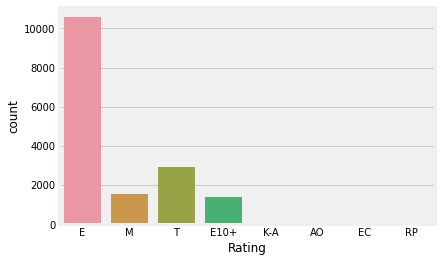

In [13]:
sns.countplot(x='Rating',data=df);

 The graph above shows 8 target with how many instance in each class.
 This showes that our data is extremly imbalanced

In [ ]:
#sns.lineplot( x="Year_of_Release", y=["NA_Sales",'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], data=df)

# Hot encoding for categorical inputs

In [14]:

# drop name since it is not good feature to encode becase it is mostly has uniqe names for each game
x=df.drop(columns=['Rating','Name'], axis=1)
y=df['Rating']
 
# Hot-Encoding categorical data that have hight possible to effect model preformance based on domain knowledge. 
# Each uniqe value in each coloum going to be represented as coloum by 0,1
# Drop first going to drop one category from each coloumn to make Alg. smarter and more light.
# Deleate acual coloumns
x = pd.get_dummies(x, columns=['Platform','Genre','Publisher','Developer'],drop_first=True)

In [31]:
x.shape

(16416, 2308)

#Cross validation spliting

In [15]:
# Data (csv) spliting to train-valid- test dataframes

#spilit the data with ratio 20% for testing and 80% for leaining
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.20, random_state=42)

# validate data to chose best models.
X_train_val, X_val, y_train_val, y_val  = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

#concat training data
train_df= pd.concat([X_train_val, y_train_val], axis=1)

#Droped year (highly overlaped feature)
Drop_X_train_val=X_train_val.drop(columns="Year_of_Release",axis=1)
Drop_X_val=X_val.drop(columns="Year_of_Release",axis=1)

#Feature selection by preforming overlap
if the range of overlap is small then the feature is good for the model to learn from it

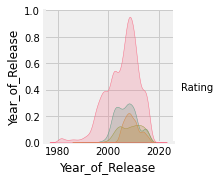

In [33]:
sns.pairplot(train_df,vars=['Year_of_Release'],hue='Rating');

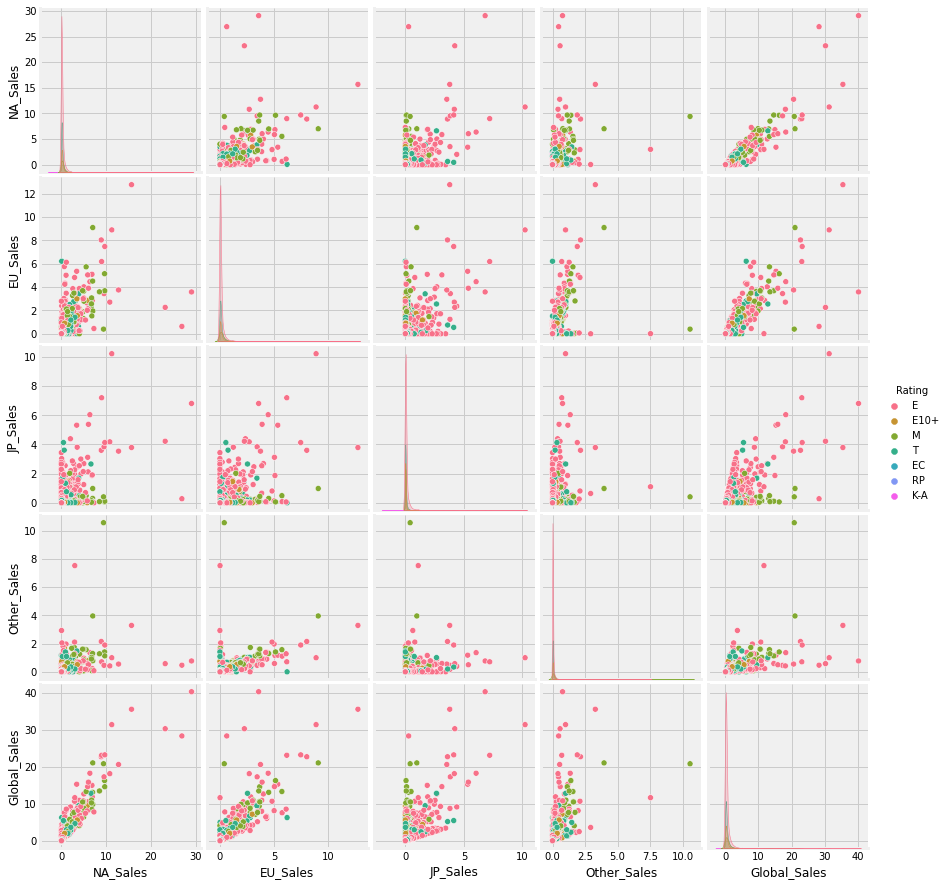

In [34]:
 sns.pairplot(train_df,vars=['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],hue='Rating');

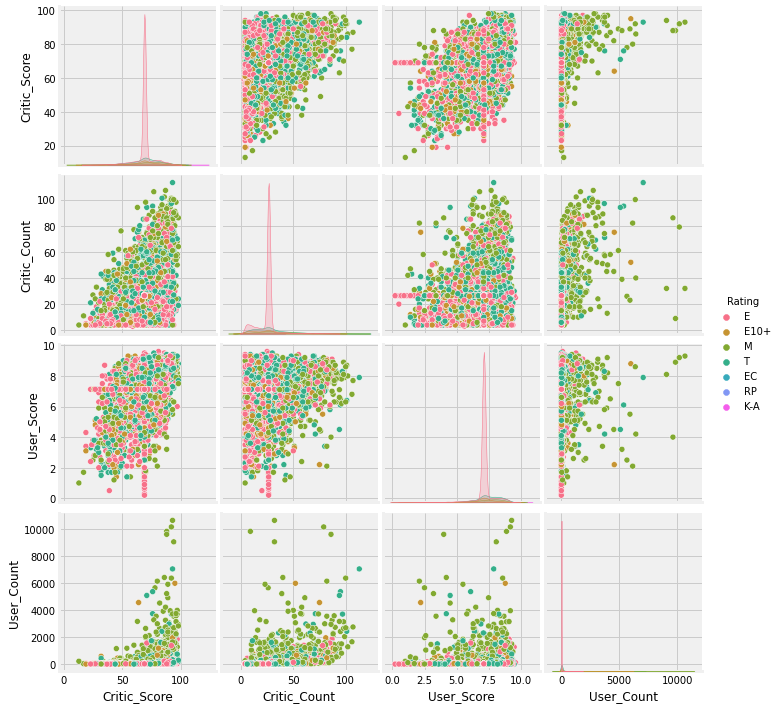

In [35]:
 sns.pairplot(train_df,vars=['Critic_Score','Critic_Count', 'User_Score', 'User_Count'],hue='Rating');

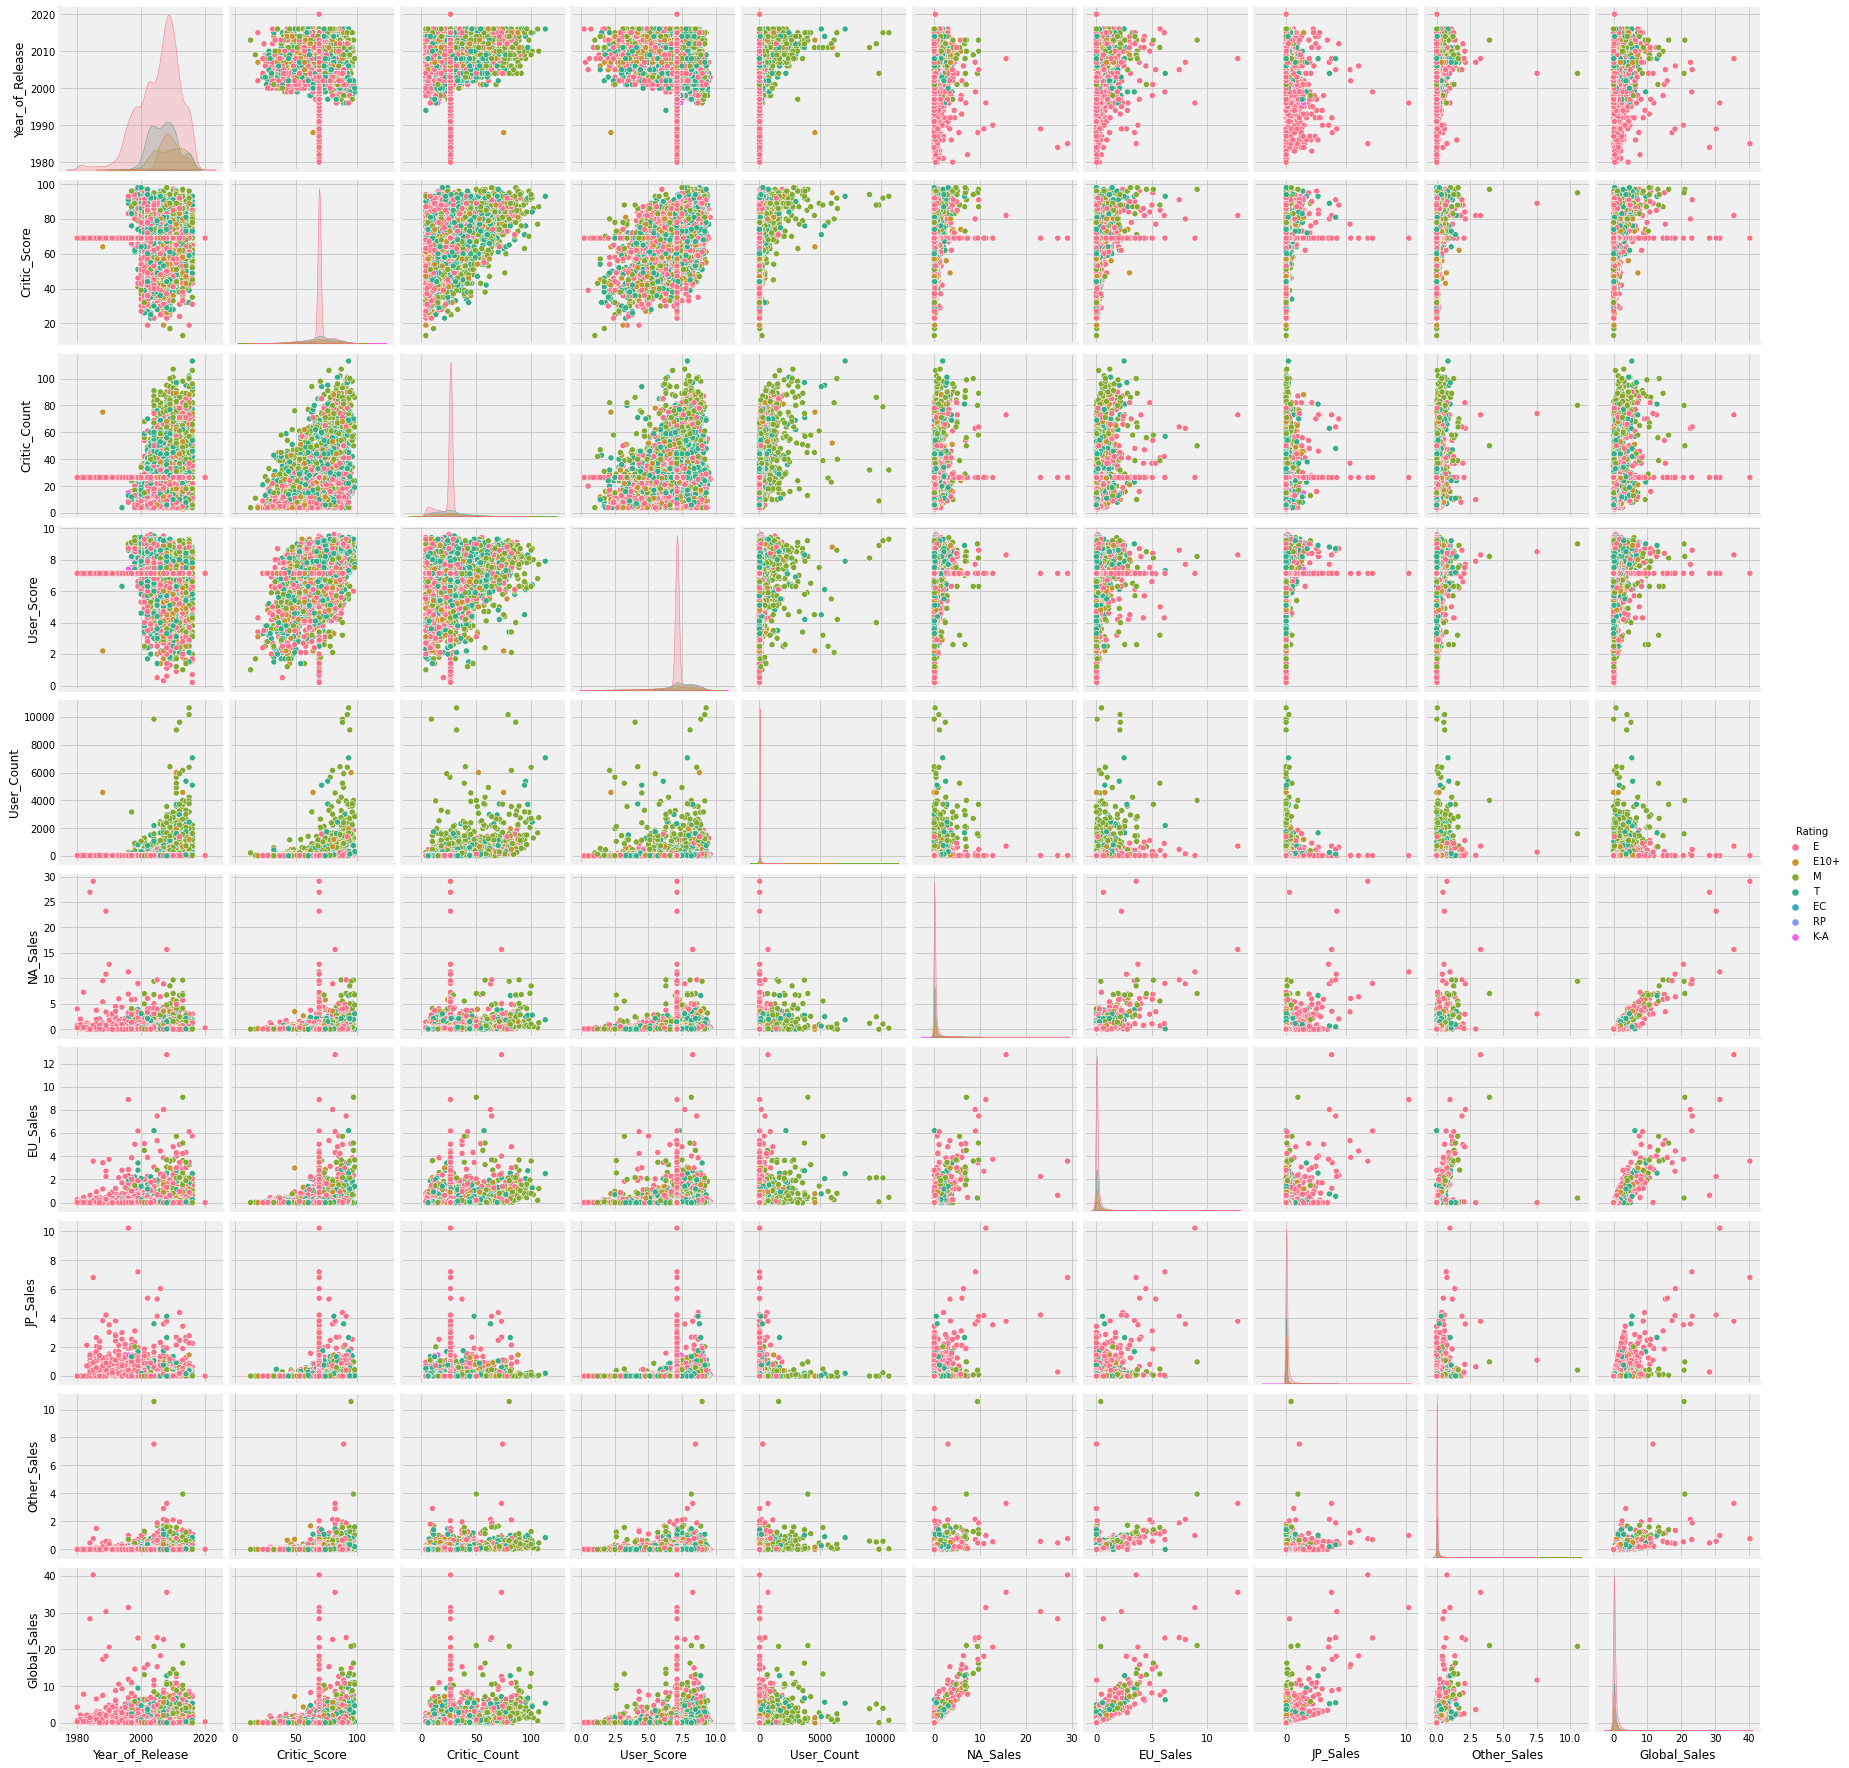

In [37]:
sns.pairplot(train_df,vars=['Year_of_Release','Critic_Score','Critic_Count', 'User_Score', 'User_Count','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],hue='Rating'); 

# Scalling data since the data is measuring different things

In [16]:
# scalling data after spliting to avoid data leakage
sc = StandardScaler()
X_train_val_sc = sc.fit_transform(X_train_val)
X_val_sc=sc.transform(X_val)

#Logistic Reggretion (Classification) model
Build LR model with different regulariztion and then applay the same without year feature since it has high over lap.
Then take the best(parameters,regularization) and implemented on testing set.

In [17]:
lm = LogisticRegression(C=1000)
s=lm.fit(X_train_val_sc, y_train_val)
s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1000)

In [18]:
y_predict = lm.predict(X_val_sc) # predicat values (y)
y_predict

array(['T', 'E', 'E', ..., 'E', 'E', 'T'], dtype=object)

In [19]:
#c==1000
print(lm.score(X_train_val_sc, y_train_val))
accuracy_score(y_val,y_predict)

0.9082341742027605


0.7963456414160639

In [20]:
#c=1
lm2= LogisticRegression()
b=lm2.fit(X_train_val_sc, y_train_val)
b

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [21]:
y_predict2 = lm2.predict(X_val_sc) # predicat values (y)
y_predict2

array(['T', 'E', 'E', ..., 'E', 'E', 'T'], dtype=object)

In [22]:
#c=1
print(lm2.score(X_train_val_sc, y_train_val))
accuracy_score(y_val,y_predict2)

0.9087101380295097


0.7990102778835173

compare acuracy when c (regularization) is high this means low complex model, and when it is low.

results show that when it is c is low (high complex model) this is butter.

In [23]:
# Compare c results 
print(lm.score(X_train_val_sc, y_train_val)> lm2.score(X_train_val_sc, y_train_val))
print(accuracy_score(y_val,y_predict)>accuracy_score(y_val,y_predict2))
# This shows that c=1 is the best hyperparameter

False
False


After see that c=1 is butter we want to see if drop feature year going to enhance acuracy?

In [24]:
#Drop_X_train_val
#Drop_X_val

# scalling data after spliting to avoid data leakage
sc1 = StandardScaler()
Drop_X_train_val_sc = sc1.fit_transform(Drop_X_train_val)
Drop_X_val_sc=sc1.transform(Drop_X_val)

lm3= LogisticRegression()
w=lm3.fit(Drop_X_train_val_sc, y_train_val)
w

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [25]:
y_predict3 = lm3.predict(Drop_X_val_sc) # predicat values (y)
y_predict3

array(['T', 'E', 'E', ..., 'E', 'E', 'T'], dtype=object)

In [26]:
print(lm3.score(Drop_X_train_val_sc, y_train_val))
accuracy_score(y_val,y_predict3)

0.9069014754878629


0.7982489531785306

So the results show that acuracy of droping year with c=1 is not the best as c=1

In [27]:
print(accuracy_score(y_val,y_predict3)>accuracy_score(y_val,y_predict2))

False


In [28]:
# result of preforimimg only c=1 to enhance the model
from sklearn.metrics import classification_report, confusion_matrix
print ("The confusion_matrix is ")
print(confusion_matrix(y_val, y_predict2))
print ("\n*************classification report is************ ")
print(classification_report(y_val, y_predict2))

The confusion_matrix is 
[[   0    0    0    1    0]
 [   0 1526   60    2   68]
 [   0   80  107    8   46]
 [   0   20    4  184   49]
 [   0  101   34   55  282]]

*************classification report is************ 
              precision    recall  f1-score   support

          AO       0.00      0.00      0.00         1
           E       0.88      0.92      0.90      1656
        E10+       0.52      0.44      0.48       241
           M       0.74      0.72      0.73       257
           T       0.63      0.60      0.62       472

    accuracy                           0.80      2627
   macro avg       0.56      0.54      0.54      2627
weighted avg       0.79      0.80      0.79      2627



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# bulding our 2nd model if any
### not valied time


#Scaling test data

In [29]:
#scaling data for testing
X_train_sc = sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

#Final results with testing data

In [30]:
#final model chosen is **LR  ** based on f1 score
lm2.fit(X_train_sc,y_train)
pred=lm2.predict(X_test_sc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
# these matrix shows acuracy, f1 score, recall and more to evaluate model results
print ("The confusion_matrix is ")
print(confusion_matrix(y_test,pred ))
print ("\n*************classification report is************ ")
print(classification_report(y_test, pred))

The confusion_matrix is 
[[   0    0    0    0    0    0    0]
 [   0 2003   58    2    1   17   59]
 [   0  100  111    0    0    5   46]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   1   17    5    0    0  217   65]
 [   0  104   29    0    0   54  390]]

*************classification report is************ 
              precision    recall  f1-score   support

          AO       0.00      0.00      0.00         0
           E       0.90      0.94      0.92      2140
        E10+       0.55      0.42      0.48       262
          EC       0.00      0.00      0.00         0
         K-A       0.00      0.00      0.00         0
           M       0.74      0.71      0.73       305
           T       0.70      0.68      0.69       577

    accuracy                           0.83      3284
   macro avg       0.41      0.39      0.40      3284
weighted avg       0.82      0.83      0.82      3284



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
